## Project Title

In [1]:
# libraries import
import numpy as np
import pandas as pd
import keras
from keras import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


### 1.Load data

In [2]:
# load data from cloud
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
y = concrete_data['Strength']
X = concrete_data.drop('Strength', axis=1)
input_shape = X.shape[1]

### 2.1.Part A

- One hidden layer of 10 nodes, and a ReLU activation function
- Use the adam optimizer and the mean squared error as the loss function

1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the train_test_split helper function from Scikit-learn
2. Train the model on the training data using 50 epochs
3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.
4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors
5. Report the mean and the standard deviation of the mean squared errors.



In [ ]:
mses_A = []
for i in range(50):
    # split data to training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    # create model
    model_A = Sequential()
    model_A.add(Dense(10, activation='relu', input_shape=(input_shape,)))
    model_A.add(Dense(1))
    # compile model
    model_A.compile(optimizer='adam', loss='mean_squared_error')
    # fit model
    model_A.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=1)
    # evaluate on test set
    mses_A.append(model_A.evaluate(X_test, y_test))

The mean squared errors' is 354.6172, 
standard deviation is 402.7219


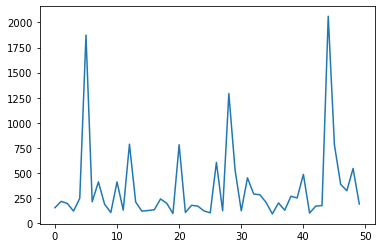

In [32]:
# draw a line plot to visualize the mses
_ = plt.plot(range(len(mses_A)), mses_A)
# print the mean and std of the mean squared errors
mse_mean_A = np.mean(mses_A)
mse_std_A = np.std(mses_A)
print("The mean squared errors' is {:.4f}, \nstandard deviation is {:.4f}".format(mse_mean_A, mse_std_A))

### 2.2. Part B

Repeat Part A but use a normalized version of the data. Recall that one way to normalize the data is by subtracting the mean from the individual predictors and dividing by the standard deviation.

In [36]:
mses_B = []
for i in range(50):
    # split data to training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    # normalize data(NOTE: only use training data to get mean and std!!)
    X_mean = X_train.mean()
    X_std = X_train.std()
    X_train_norm = (X_train - X_mean) / X_std
    X_test_norm = (X_test - X_mean) / X_std
    
    # create model
    model_B = Sequential()
    model_B.add(Dense(10, activation='relu', input_shape=(input_shape,)))
    model_B.add(Dense(1))
    # compile model
    model_B.compile(optimizer='adam', loss='mean_squared_error')
    # fit model
    model_B.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=50, verbose=0)
    # evaluate on test set
    mses_B.append(model_B.evaluate(X_test_norm, y_test))

309/309 [==============================] - 0s 98us/step


The mean squared errors' is 352.3021, 
standard deviation is 93.9147


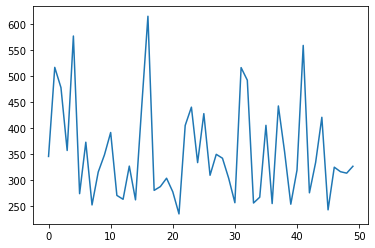

In [37]:
# draw a line plot to visualize the mses
_ = plt.plot(range(len(mses_B)), mses_B)
# print the mean and std of the mean squared errors
mse_mean_B = np.mean(mses_B)
mse_std_B = np.std(mses_B)
print("The mean squared errors' is {:.4f}, \nstandard deviation is {:.4f}".format(mse_mean_B, mse_std_B))

`Comment:
    Compare with part A, the result is slightly different with part A in terms of MSE-mean, whereas MSE-std is much smaller than part A. It means that the part B model is more stable.`

### 2.3. Part C

Repeat Part B but use 100 epochs this time for training

In [38]:
mses_C = []
for i in range(50):
    # split data to training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    # normalize data(NOTE: only use training data to get mean and std!!)
    X_mean = X_train.mean()
    X_std = X_train.std()
    X_train_norm = (X_train - X_mean) / X_std
    X_test_norm = (X_test - X_mean) / X_std
    
    # create model
    model_C = Sequential()
    model_C.add(Dense(10, activation='relu', input_shape=(input_shape,)))
    model_C.add(Dense(1))
    # compile model
    model_C.compile(optimizer='adam', loss='mean_squared_error')
    # fit model
    model_C.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=100, verbose=0)
    # evaluate on test set
    mses_C.append(model_C.evaluate(X_test_norm, y_test))

309/309 [==============================] - 0s 92us/step


The mean squared errors' is 165.9953, 
standard deviation is 17.0475


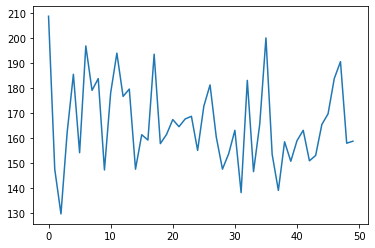

In [39]:
# draw a line plot to visualize the mses
_ = plt.plot(range(len(mses_C)), mses_C)
# print the mean and std of the mean squared errors
mse_mean_C = np.mean(mses_C)
mse_std_C = np.std(mses_C)
print("The mean squared errors' is {:.4f}, \nstandard deviation is {:.4f}".format(mse_mean_C, mse_std_C))

`Comment:
    The MSE-mean is much smaller than part B due to the increment of epochs, so the model of part B is underfitting, and model of part C is better fitting than part B.`

### 2.4.Part D

Repeat part B but use a neural network with the following instead:

- Three hidden layers, each of 10 nodes and ReLU activation function.

In [42]:
mses_D = []
for i in range(50):
    # split data to training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    # normalize data(NOTE: only use training data to get mean and std!!)
    X_mean = X_train.mean()
    X_std = X_train.std()
    X_train_norm = (X_train - X_mean) / X_std
    X_test_norm = (X_test - X_mean) / X_std
    
    # create model
    model_D = Sequential()
    model_D.add(Dense(10, activation='relu', input_shape=(input_shape,)))
    model_D.add(Dense(10, activation='relu'))
    model_D.add(Dense(10, activation='relu'))
    model_D.add(Dense(1))
    # compile model
    model_D.compile(optimizer='adam', loss='mean_squared_error')
    # fit model
    model_D.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=50, verbose=0)
    # evaluate on test set
    mses_D.append(model_D.evaluate(X_test_norm, y_test))

309/309 [==============================] - 0s 138us/step


The mean squared errors' is 127.2886, 
standard deviation is 19.5592


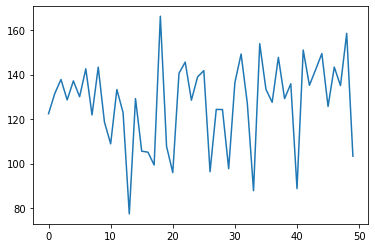

In [43]:
# draw a line plot to visualize the mses
_ = plt.plot(range(len(mses_D)), mses_D)
# print the mean and std of the mean squared errors
mse_mean_D = np.mean(mses_D)
mse_std_D = np.std(mses_D)
print("The mean squared errors' is {:.4f}, \nstandard deviation is {:.4f}".format(mse_mean_D, mse_std_D))

`Comment:
    The MSE-mean of this part is also much smaller than part B, because the its model is more complex than part B, than now it's well-fitted.`